In [1]:
from contra_qa.text_generation.boolean3_NP_and import boolean3
from contra_qa.text_generation.boolean4_VP_and import boolean4
from contra_qa.text_generation.boolean5_AP_and import boolean5
from contra_qa.text_processing.functions import simple_pre_process_text_df
from contra_qa.plots.functions  import plot_histogram_from_labels
import numpy as np
import torch
from torchtext import data

import pandas as pd
% matplotlib inline

creating datasets

In [2]:
boolean3()
# boolean4()
# boolean5()

In [3]:
df3 = pd.read_csv("data/boolean3_train.csv") 

In [4]:
df3.head()

,sentence1,sentence2,and_A,and_B,label
0,Agnes has visited Blaj and Mangalia,Agnes didn't visit Blaj,Agnes has visited Blaj,Agnes has visited Mangalia,1
1,Rene went to Giurgiu and Dej,Rene didn't go to Giurgiu,Rene went to Giurgiu,Rene went to Dej,1
2,Scott and Jesus have traveled to Hunedoara,Jesus didn't travel to Turda,Scott has traveled to Hunedoara,Jesus has traveled to Hunedoara,0
3,Shane and Allen have visited Oradea,Guadalupe didn't visit Oradea,Shane has visited Oradea,Allen has visited Oradea,0
4,Lawrence has traveled to Hunedoara and Bucharest,Lawrence didn't travel to Bucharest,Lawrence has traveled to Hunedoara,Lawrence has traveled to Bucharest,1


In [5]:
simple_pre_process_text_df(df3, "sentence1")
simple_pre_process_text_df(df3, "sentence2")
simple_pre_process_text_df(df3, "and_A")
simple_pre_process_text_df(df3, "and_B")

df3["text"] = df3["sentence1"] + ", " + df3["sentence2"]

In [6]:
df3.head()

,sentence1,sentence2,and_A,and_B,label,text
0,agnes has visited blaj and mangalia,agnes didnt visit blaj,agnes has visited blaj,agnes has visited mangalia,1,"agnes has visited blaj and mangalia, agnes did..."
1,rene went to giurgiu and dej,rene didnt go to giurgiu,rene went to giurgiu,rene went to dej,1,"rene went to giurgiu and dej, rene didnt go to..."
2,scott and jesus have traveled to hunedoara,jesus didnt travel to turda,scott has traveled to hunedoara,jesus has traveled to hunedoara,0,"scott and jesus have traveled to hunedoara, je..."
3,shane and allen have visited oradea,guadalupe didnt visit oradea,shane has visited oradea,allen has visited oradea,0,"shane and allen have visited oradea, guadalupe..."
4,lawrence has traveled to hunedoara and bucharest,lawrence didnt travel to bucharest,lawrence has traveled to hunedoara,lawrence has traveled to bucharest,1,lawrence has traveled to hunedoara and buchare...


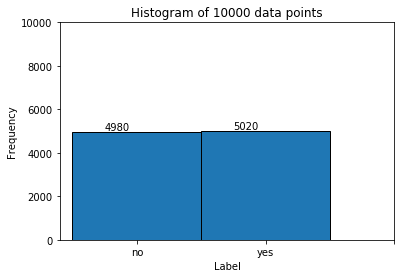

In [7]:
plot_histogram_from_labels(df3.label.values, ["no", "yes"], "test.png") 

In [8]:
df3_little = df3[["text", "label"]]

In [9]:
df3_little.head()

,text,label
0,"agnes has visited blaj and mangalia, agnes did...",1
1,"rene went to giurgiu and dej, rene didnt go to...",1
2,"scott and jesus have traveled to hunedoara, je...",0
3,"shane and allen have visited oradea, guadalupe...",0
4,lawrence has traveled to hunedoara and buchare...,1


In [10]:
train_data_path = "data/boolean_3_train_lab.csv"

df3_little.to_csv(train_data_path, header=False, index=False)

In [11]:
TEXT = data.Field()
LABEL = data.LabelField(tensor_type=torch.FloatTensor)
train = data.TabularDataset(path=train_data_path,
                            format="csv",
                            fields=[('text', TEXT), ('label', LABEL)])

In [12]:
TEXT.build_vocab(train, max_size=25000)
LABEL.build_vocab(train)

In [13]:
print('len(TEXT.vocab):', len(TEXT.vocab))
print('len(LABEL.vocab):', len(LABEL.vocab))

len(TEXT.vocab): 708
len(LABEL.vocab): 2


In [14]:
df3_little.head()

,text,label
0,"agnes has visited blaj and mangalia, agnes did...",1
1,"rene went to giurgiu and dej, rene didnt go to...",1
2,"scott and jesus have traveled to hunedoara, je...",0
3,"shane and allen have visited oradea, guadalupe...",0
4,lawrence has traveled to hunedoara and buchare...,1


In [15]:
df3.head()

,sentence1,sentence2,and_A,and_B,label,text
0,agnes has visited blaj and mangalia,agnes didnt visit blaj,agnes has visited blaj,agnes has visited mangalia,1,"agnes has visited blaj and mangalia, agnes did..."
1,rene went to giurgiu and dej,rene didnt go to giurgiu,rene went to giurgiu,rene went to dej,1,"rene went to giurgiu and dej, rene didnt go to..."
2,scott and jesus have traveled to hunedoara,jesus didnt travel to turda,scott has traveled to hunedoara,jesus has traveled to hunedoara,0,"scott and jesus have traveled to hunedoara, je..."
3,shane and allen have visited oradea,guadalupe didnt visit oradea,shane has visited oradea,allen has visited oradea,0,"shane and allen have visited oradea, guadalupe..."
4,lawrence has traveled to hunedoara and bucharest,lawrence didnt travel to bucharest,lawrence has traveled to hunedoara,lawrence has traveled to bucharest,1,lawrence has traveled to hunedoara and buchare...


In [16]:
exampleS1 = list(df3.sentence1.values)[0:3]
exampleS2 = list(df3.sentence2.values)[0:3]
exampleA = list(df3.and_A.values)[0:3]
exampleB = list(df3.and_B.values)[0:3]
exampleLabel = list(df3.label.values)[0:3]

In [17]:
exampleS1i = []
for line in exampleS1:
    line = line.split(" ")
    new_line = [TEXT.vocab.stoi[word] for word in line]
    exampleS1i.append(new_line)
    
for a,b in zip(exampleS1, exampleS1i):
    print(a)
    print(b)
    print()

agnes has visited blaj and mangalia
[693, 5, 7, 30, 3, 34]

rene went to giurgiu and dej
[268, 12, 2, 29, 3, 19]

scott and jesus have traveled to hunedoara
[381, 3, 369, 10, 9, 2, 18]



In [18]:
exampleS2i = []
for line in exampleS2:
    line = line.split(" ")
    new_line = [TEXT.vocab.stoi[word] for word in line]
    exampleS2i.append(new_line)
    
for a,b in zip(exampleS2, exampleS2i):
    print(a)
    print(b)
    print()

agnes didnt visit blaj
[693, 4, 6, 30]

rene didnt go to giurgiu
[268, 4, 11, 2, 29]

jesus didnt travel to turda
[369, 4, 8, 2, 16]



In [19]:
exampleAi = []
for line in exampleA:
    line = line.split(" ")
    new_line = [TEXT.vocab.stoi[word] for word in line]
    exampleAi.append(new_line)
    
for a,b in zip(exampleA, exampleAi):
    print(a)
    print(b)
    print()

agnes has visited blaj
[693, 5, 7, 30]

rene went to giurgiu
[268, 12, 2, 29]

scott has traveled to hunedoara
[381, 5, 9, 2, 18]



In [20]:
exampleBi = []
for line in exampleB:
    line = line.split(" ")
    new_line = [TEXT.vocab.stoi[word] for word in line]
    exampleBi.append(new_line)
    
for a,b in zip(exampleB, exampleBi):
    print(a)
    print(b)
    print()

agnes has visited mangalia
[693, 5, 7, 34]

rene went to dej
[268, 12, 2, 19]

jesus has traveled to hunedoara
[369, 5, 9, 2, 18]

